In [4]:
from ipynb.fs.full.data_parser import df
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm

Path to dataset files: C:\Users\bohda\.cache\kagglehub\datasets\abdulmannann\road-accidents-csv\versions\1


Ten skrypt importuje frame'a z pliku data_parser.ipynb 
Tu będzie przeprowadzać się pewna analiza

In [5]:
df

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car
1,200901BS70002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19:00,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10:00,Urban,Other,Motorcycle over 500cc
4,200901BS70005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25:00,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,201091NM01760,2022-02-18,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,Highland,NaN,...,2,1,Northern,Dry,Single carriageway,60,07:00:00,Rural,Fine no high winds,Car
307969,201091NM01881,2022-02-21,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.232273,Darkness - no lighting,Highland,NaN,...,1,1,Northern,Frost or ice,Single carriageway,60,03:00:00,Rural,Fine no high winds,Car
307970,201091NM01935,2022-02-23,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,57.585044,Daylight,Highland,NaN,...,1,3,Northern,Frost or ice,Single carriageway,30,09:38:00,Rural,Fine no high winds,Car
307971,201091NM01964,2022-02-23,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,57.214898,Darkness - no lighting,Highland,NaN,...,1,2,Northern,Wet or damp,Single carriageway,60,18:25:00,Rural,Fine no high winds,Motorcycle over 500cc


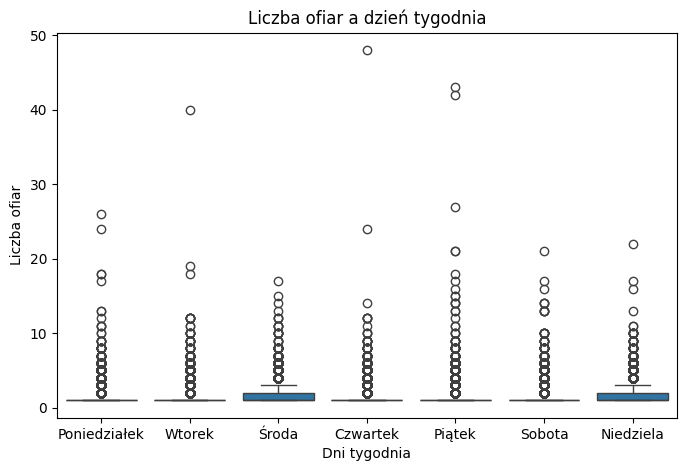

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Day_of_Week', y='Number_of_Casualties', data=df)
plt.title("Liczba ofiar a dzień tygodnia")
plt.xlabel("Dni tygodnia")
plt.ylabel("Liczba ofiar")

plt.xticks(
    ticks=[0,1,2,3,4,5,6],
    labels=["Poniedziałek", "Wtorek", "Środa", "Czwartek", "Piątek", "Sobota", "Niedziela"]
)

plt.show()


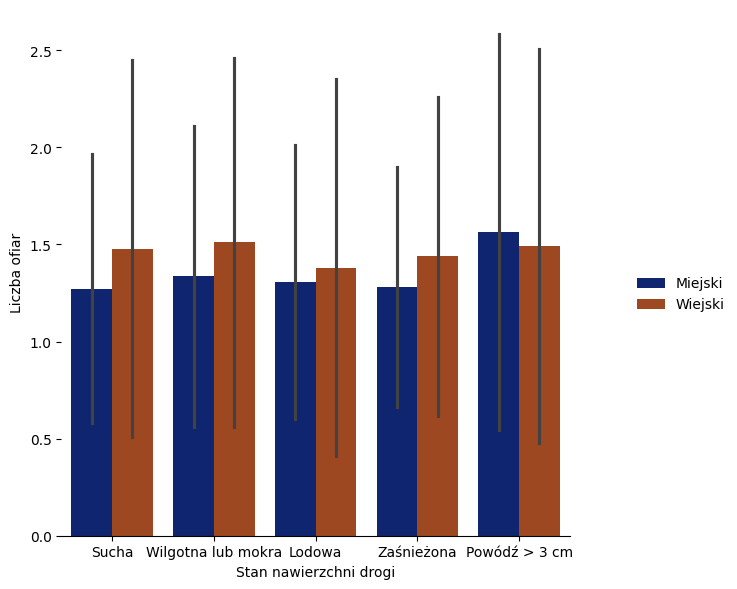

In [17]:
g = sns.catplot(
    data=df, kind="bar",
    x="Road_Surface_Conditions", y="Number_of_Casualties", hue="Urban_or_Rural_Area",
    errorbar="sd", palette="dark", alpha=1, height=6
)

g.despine(left=True)
g.set_axis_labels("Stan nawierzchni drogi", "Liczba ofiar")
g.legend.set_title("")

etykiety_x = [
    "Sucha", 
    "Wilgotna lub mokra", 
    "Lodowa", 
    "Zaśnieżona", 
    "Powódź > 3 cm"
]

g.set_xticklabels(etykiety_x)

nowe_etykiety_legendy = ["Miejski", "Wiejski"]
for t, n in zip(g.legend.texts, nowe_etykiety_legendy):
    t.set_text(n)



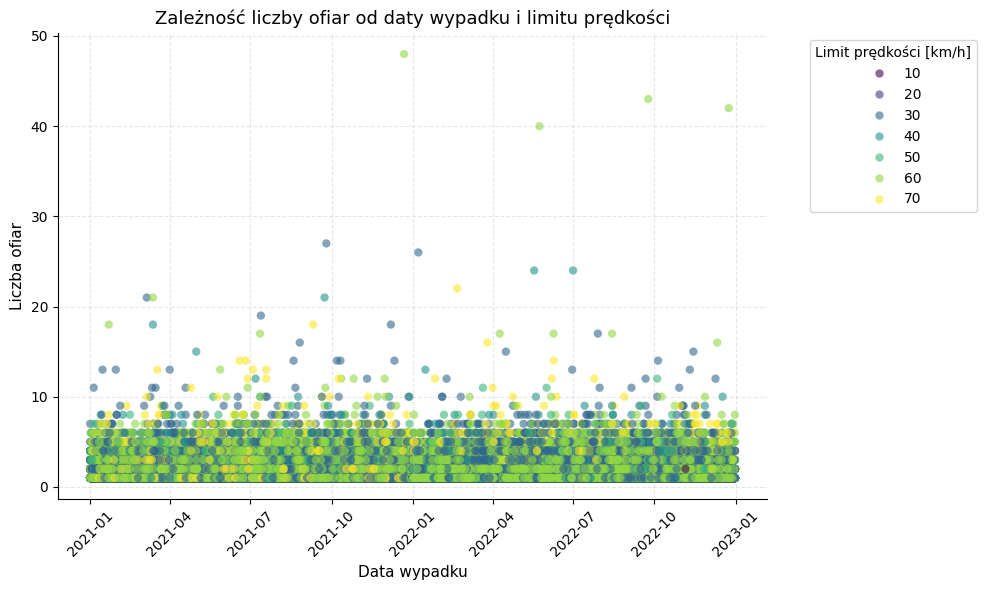

In [8]:
f, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x="Accident Date",
    y="Number_of_Casualties",
    hue="Speed_limit",
    size="depth" if "depth" in df.columns else None,
    palette="viridis",
    sizes=(20, 80),
    alpha=0.6,
    linewidth=0,
    ax=ax
)

plt.xticks(rotation=45)
ax.set_title("Zależność liczby ofiar od daty wypadku i limitu prędkości", fontsize=13)
ax.set_xlabel("Data wypadku", fontsize=11)
ax.set_ylabel("Liczba ofiar", fontsize=11)
ax.grid(True, linestyle="--", alpha=0.3)
sns.despine()
ax.legend(title="Limit prędkości [km/h]", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

<Axes: xlabel='Number_of_Casualties', ylabel='Number_of_Vehicles'>

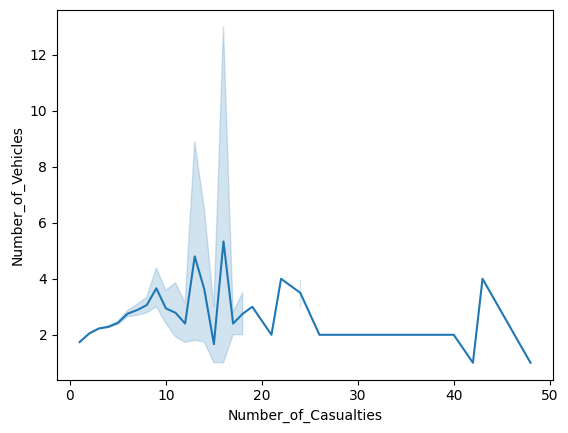

In [9]:

sns.lineplot(x="Number_of_Casualties", y="Number_of_Vehicles",
             data=df)

<Axes: xlabel='Number_of_Casualties', ylabel='Number_of_Vehicles'>

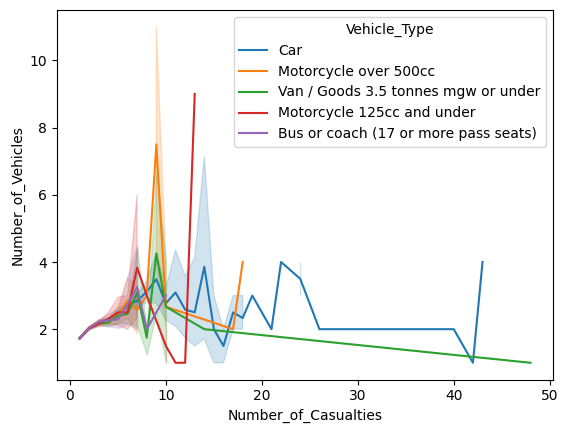

In [10]:
top_types = df['Vehicle_Type'].value_counts().nlargest(5).index
sns.lineplot(
    x="Number_of_Casualties",
    y="Number_of_Vehicles",
    hue="Vehicle_Type",
    data=df[df['Vehicle_Type'].isin(top_types)]
)


